In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel(r"C:\Users\admin\Downloads\Airbnb_data.xlsx")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74105 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    73923 non-null  object 
 14  host_identity_verified  73923 non-null

In [4]:
df.describe()

,id,log_price,accommodates,bathrooms,host_response_rate,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
count,7.411100e+04,74111.000000,74111.000000,73911.000000,55812.000000,74111.000000,74111.000000,74111.000000,57389.000000,74020.000000,73980.000000
mean,1.126662e+07,4.782069,3.155146,1.235263,0.943520,38.445958,-92.397525,20.900568,94.067365,1.265793,1.710868
std,6.081735e+06,0.717394,2.153589,0.582044,0.163418,3.080167,21.705322,37.828641,7.836556,0.852143,1.254142
min,3.440000e+02,0.000000,1.000000,0.000000,0.000000,33.338905,-122.511500,0.000000,20.000000,0.000000,0.000000
25%,6.261964e+06,4.317488,2.000000,1.000000,1.000000,34.127908,-118.342374,1.000000,92.000000,1.000000,1.000000
50%,1.225415e+07,4.709530,2.000000,1.000000,1.000000,40.662138,-76.996965,6.000000,96.000000,1.000000,1.000000
75%,1.640226e+07,5.220356,4.000000,1.000000,1.000000,40.746096,-73.954660,23.000000,100.000000,1.000000,2.000000
max,2.123090e+07,7.600402,16.000000,8.000000,1.000000,42.390437,-70.985047,605.000000,100.000000,10.000000,18.000000


In [5]:
# checking missing values with both counts and percentages

#creating a dictonary with values as empty list
missing_df={"Columns":[],'Missing Count': [], 'Missing %': []}

#Evaluating the total null values and appending in the empy list of dictonary with value greater than 0
for columns in df.columns:
    missing_count= df[columns].isnull().sum()
    missing_percent = (missing_count / len(df)) * 100
    if missing_count >0:
        missing_df["Columns"].append(columns)
        missing_df["Missing Count"].append(missing_count)
        missing_df["Missing %"].append(missing_percent)


In [6]:
# converting dictonary into data frame and sorting it by missing %
missing_df=pd.DataFrame(missing_df).sort_values(by='Missing %', ascending=False)

In [7]:
missing_df

,Columns,Missing Count,Missing %
5,host_response_rate,18299,24.691341
10,review_scores_rating,16722,22.563452
2,first_review,15864,21.405729
7,last_review,15827,21.355804
11,thumbnail_url,8216,11.086074
9,neighbourhood,6872,9.272578
12,zipcode,968,1.306149
0,bathrooms,200,0.269865
3,host_has_profile_pic,188,0.253674
4,host_identity_verified,188,0.253674


In [9]:
# Convert dates
df['first_review'] = pd.to_datetime(df['first_review'], errors='coerce')
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')
df['host_since'] = pd.to_datetime(df['host_since'], errors='coerce')

# Convert 't'/'f' to boolean
df['host_has_profile_pic'].replace({'t': True, 'f': False},inplace=True)
df['host_identity_verified'].replace({'t': True, 'f': False},inplace=True)
df['instant_bookable'].replace({'t': True, 'f': False},inplace=True)

In [11]:
#Impute Missing numerical Values
for column in missing_df["Columns"]:
    if df[column].dtype == "float64" or df[column].dtype == "int64":
        df[column].fillna(df[column].median(), inplace=True)
        

#Impute Missing Categorical Values
df['neighbourhood'].fillna('None', inplace=True)
df['zipcode'].fillna('00000', inplace=True)


#Impute Missing Boolean Values
df['host_has_profile_pic'].fillna(False, inplace=True)
df['host_identity_verified'].fillna(False, inplace=True)


#drop low-value text fields
df.drop(['description', 'thumbnail_url', 'name'], axis=1, inplace=True)

In [13]:
# Actual price from log
df['price'] = np.exp(df['log_price'])

# Number of amenities
df['amenities_count']=df['amenities'].apply(lambda x: len(x.strip("{}").split(",")))

# Host active duration
df['host_duration_days'] = (pd.to_datetime("today") - df['host_since']).dt.days
    
# Days since last review
df['days_since_last_review'] = (pd.to_datetime("today") - df['last_review']).dt.days

# Total review activity score
df['reviews_per_day'] = df['number_of_reviews'] / (df['host_duration_days'] + 1)
 # 1 is for To avoid division by zero for new hosts or missing data

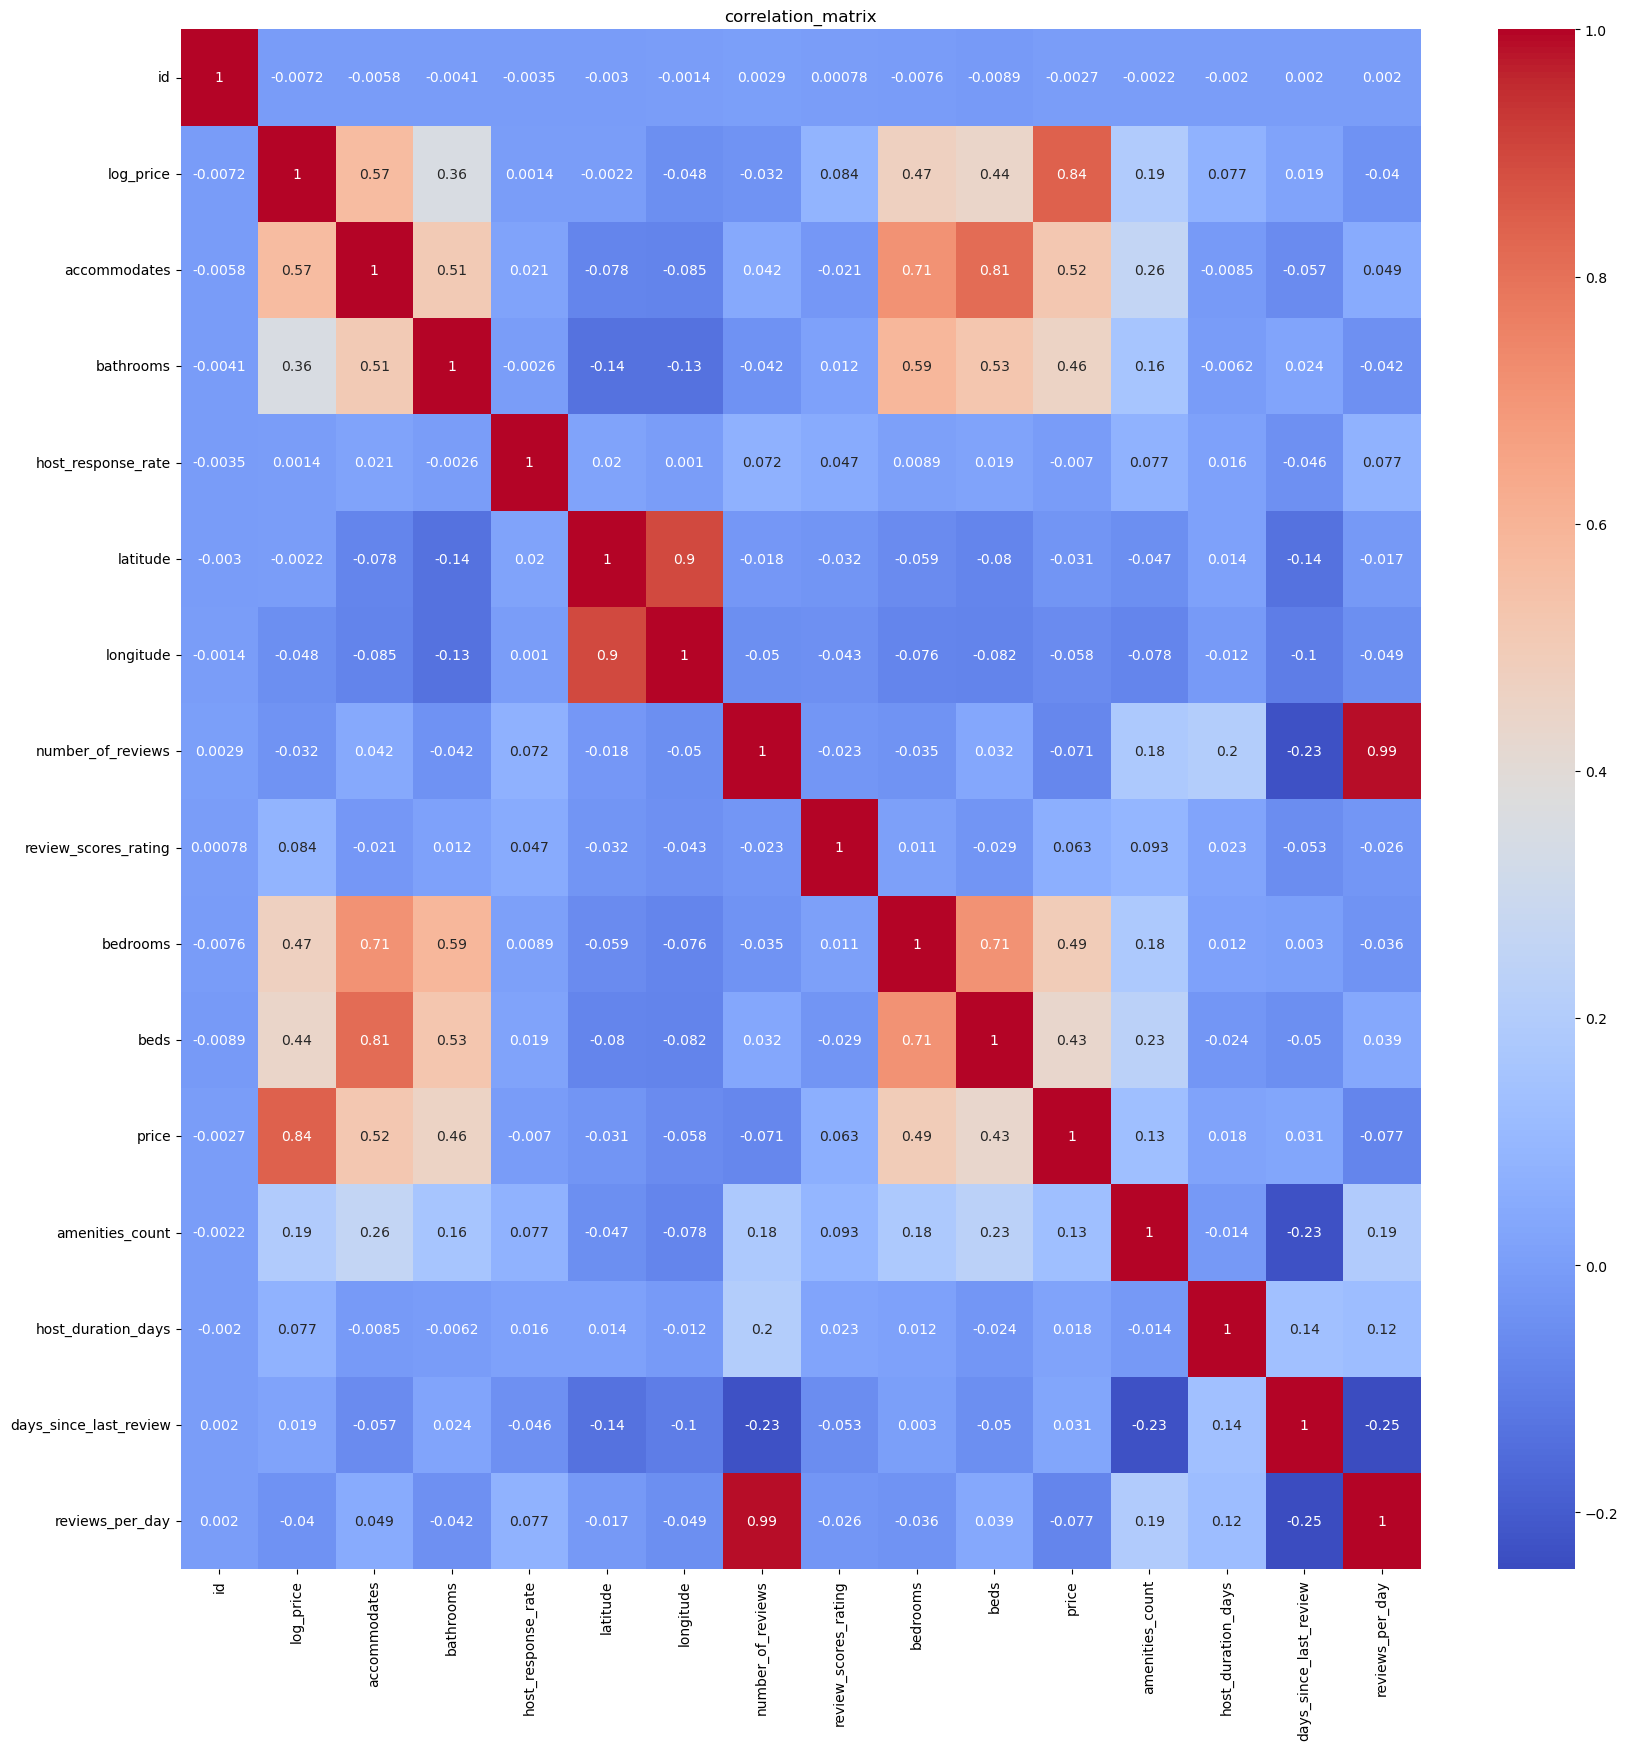

In [15]:
# finding only numerical column from the data for coreelation
numerical_column_list=[]
for column in df.columns:
    if df[column].dtype == "float64" or df[column].dtype == "int64":
        numerical_column_list.append(column)

        
        
#correlation matrix       
plt.figure(figsize=(20,20))
sns.heatmap(df[numerical_column_list].corr(),annot=True, cmap="coolwarm")
plt.title("correlation_matrix")
plt.show()

In [17]:
df

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,number_of_reviews,review_scores_rating,zipcode,bedrooms,beds,price,amenities_count,host_duration_days,days_since_last_review,reviews_per_day
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,2,100.0,11201,1.0,1.0,150.0,9,4826.0,3251.0,0.000414
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,6,93.0,10019,3.0,3.0,169.0,15,2915.0,2819.0,0.002058
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,10,92.0,10027,1.0,3.0,145.0,19,3152.0,2828.0,0.003172
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,0,96.0,94117,2.0,2.0,750.0,15,3707.0,NaN,0.000000
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,4,40.0,20009,0.0,1.0,115.0,12,3813.0,3063.0,0.001049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74106,14549287,4.605170,Apartment,Private room,{},1,1.0,Real Bed,flexible,False,...,0,96.0,11206,1.0,1.0,100.0,1,4463.0,NaN,0.000000
74107,13281809,5.043425,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,2.0,Real Bed,moderate,True,...,16,93.0,90254,2.0,4.0,155.0,16,3386.0,2980.0,0.004724
74108,18688039,5.220356,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",5,1.0,Real Bed,moderate,True,...,43,94.0,11206,2.0,2.0,185.0,31,4790.0,2803.0,0.008975
74109,17045948,5.273000,Apartment,Entire home/apt,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",2,1.0,Real Bed,strict,True,...,0,96.0,10011,0.0,2.0,195.0,15,2825.0,NaN,0.000000


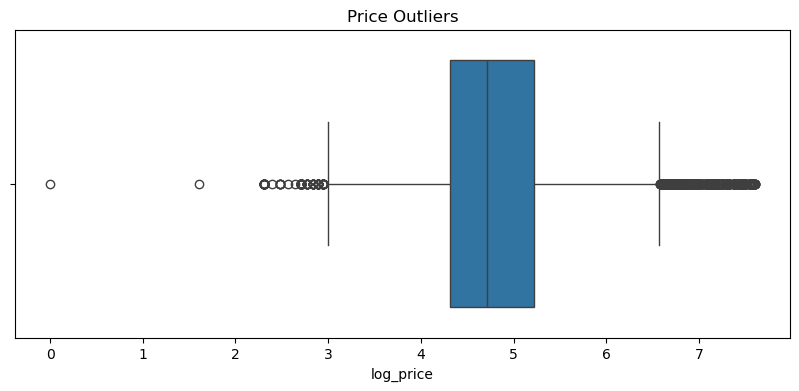

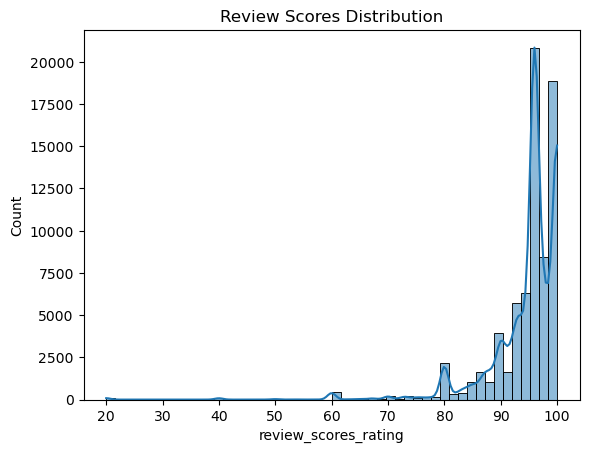

In [19]:
# checking outliers
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['log_price'])
plt.title("Price Outliers")
plt.show()

sns.histplot(df['review_scores_rating'], bins=50, kde=True)
plt.title("Review Scores Distribution")
plt.show()